m = 1071.7669820349945 +- 14.184621135458576
n = 50.925308307110626 +- 1.209112672823245
Chi2       = 16.235000190243017
dof        = 24
Chi2_red   = 0.6764583412601257


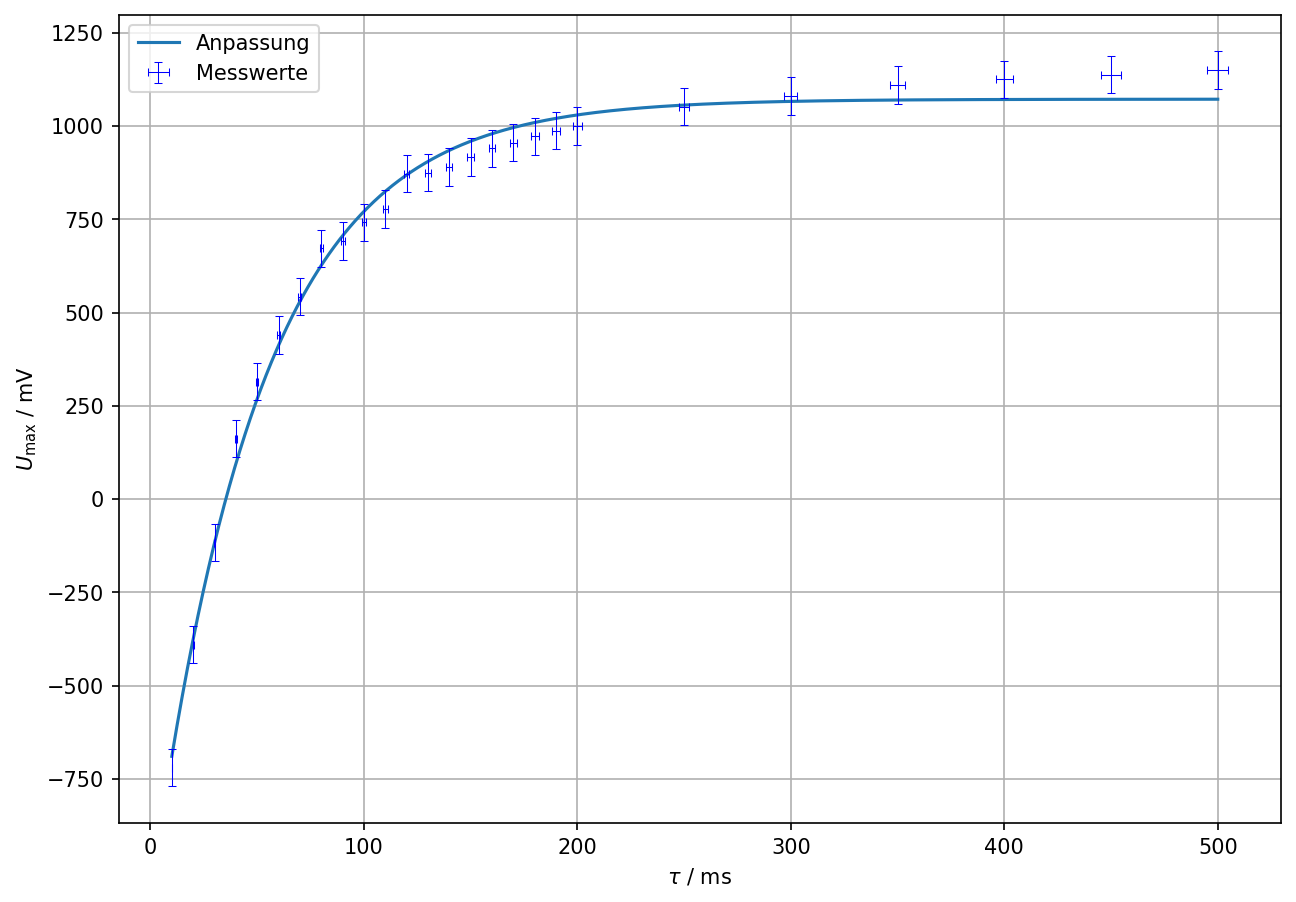

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.optimize import curve_fit

figure(figsize=(10,7), dpi=150)

#umax = np.loadtxt('../data/polarisation.txt', skiprows=3, usecols=1)
#tau = np.loadtxt('../data/polarisation.txt', skiprows=3, usecols=0)
umax = np.loadtxt('../data/polarisation.txt', skiprows=1, usecols=1)
tau = np.loadtxt('../data/polarisation.txt', skiprows=1, usecols=0)
dumax=[50]*len(umax)
dtau=0.01*tau

def f(x,m,n):
    return m*(1-2.0*np.exp(-x/n))

popt, pcov=curve_fit(f,tau,umax,
                     sigma=dumax,
                     absolute_sigma=True,
                     p0 = [np.max(umax), 60],
                     bounds = ([0, 0], [np.inf, np.inf]))
perr=np.sqrt(np.diag(pcov))
tau_fit = np.linspace(min(tau), max(tau), 1000)
plt.plot(tau_fit,f(tau_fit,*popt), label='Anpassung')


#print(chisquare(umax,f_exp=f(tum,*popt)))

print("m =", popt[0], "+-", perr[0])
print("n =", popt[1], "+-", perr[1])
#print('a =', popt[2], "+-", perr[2])
# compute chi-square
chi2 = np.sum(((umax - f(tau, *popt)) / dumax)**2)

# degrees of freedom = number of data points - number of parameters
dof = len(tau) - len(popt)

chi2_red = chi2 / dof

print("Chi2       =", chi2)
print("dof        =", dof)
print("Chi2_red   =", chi2_red)



plt.errorbar(tau,umax,xerr=dtau,yerr=dumax, ls='', capsize=2,elinewidth=0.5, capthick=0.5, color='blue',label='Messwerte')
#plt.plot(tum,umax)
plt.xlabel(r'$\tau$ / ms')
plt.ylabel(r'$U_{\mathrm{max}}$ / mV')
plt.grid(which='minor',linewidth=0.2)
plt.grid(which='major')
plt.legend(loc='upper left')
plt.savefig('../LateX/plots/polarisation.pdf')

In [3]:
# dataframe
df = pd.DataFrame({
    r'$\tau$':tau,
    r'$d\tau$':dtau,
    r'$U$ / mV':umax,
    r'$dU$ / mV':dumax
})
print(df.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
$\tau$ & $d\tau$ & $U$ / mV & $dU$ / mV \\
\midrule
10.000000 & 0.100000 & -720.000000 & 50 \\
20.000000 & 0.200000 & -390.000000 & 50 \\
30.000000 & 0.300000 & -117.000000 & 50 \\
40.000000 & 0.400000 & 162.000000 & 50 \\
50.000000 & 0.500000 & 315.000000 & 50 \\
60.000000 & 0.600000 & 440.000000 & 50 \\
70.000000 & 0.700000 & 542.000000 & 50 \\
80.000000 & 0.800000 & 672.000000 & 50 \\
90.000000 & 0.900000 & 692.000000 & 50 \\
100.000000 & 1.000000 & 742.000000 & 50 \\
110.000000 & 1.100000 & 777.000000 & 50 \\
120.000000 & 1.200000 & 872.000000 & 50 \\
130.000000 & 1.300000 & 875.000000 & 50 \\
140.000000 & 1.400000 & 890.000000 & 50 \\
150.000000 & 1.500000 & 917.000000 & 50 \\
160.000000 & 1.600000 & 940.000000 & 50 \\
170.000000 & 1.700000 & 955.000000 & 50 \\
180.000000 & 1.800000 & 972.000000 & 50 \\
190.000000 & 1.900000 & 987.000000 & 50 \\
200.000000 & 2.000000 & 1000.000000 & 50 \\
250.000000 & 2.500000 & 1052.000000 & 50 \\
300.000000 & 3.000